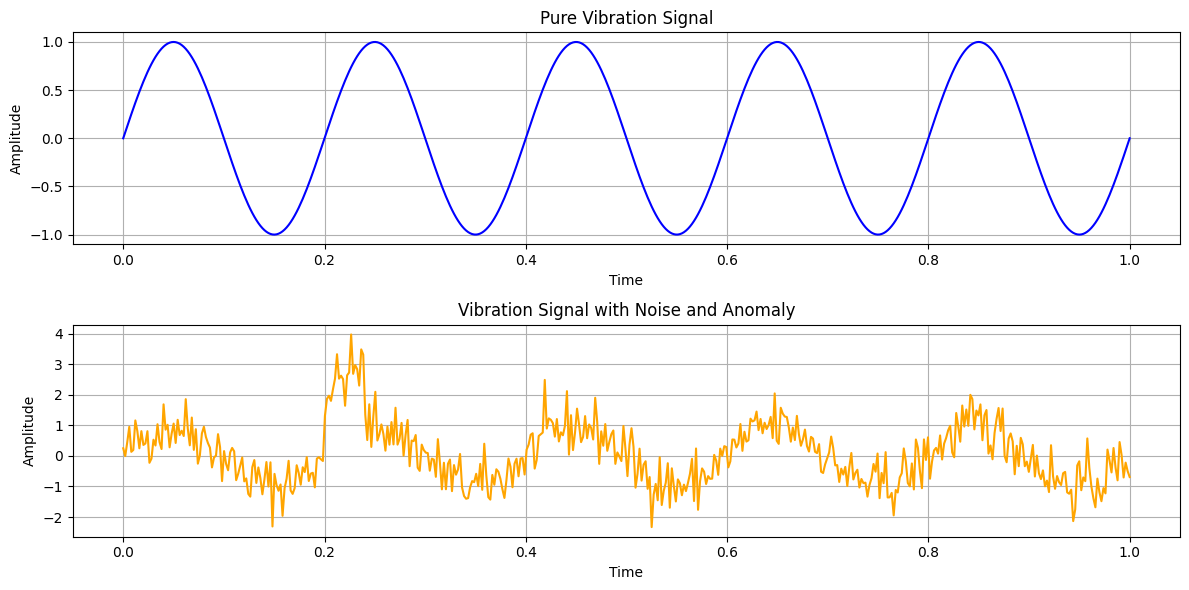

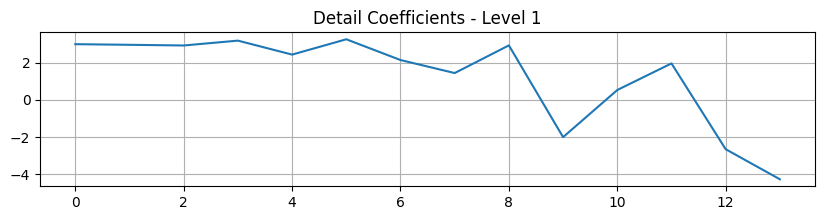

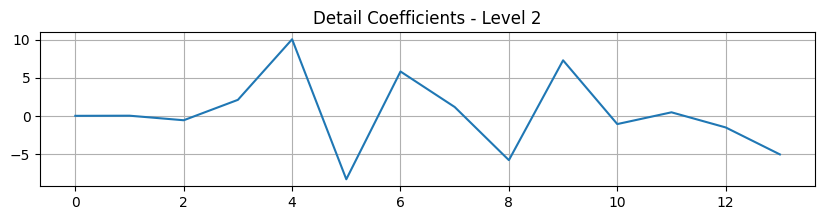

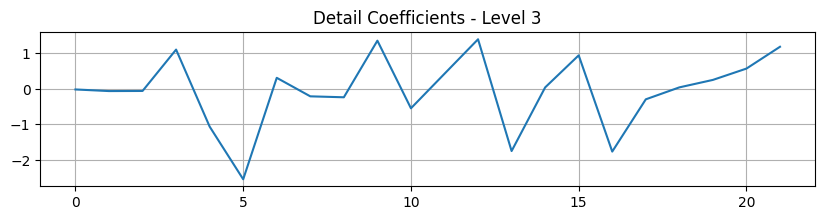

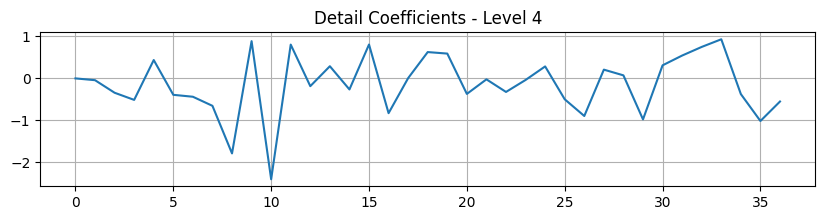

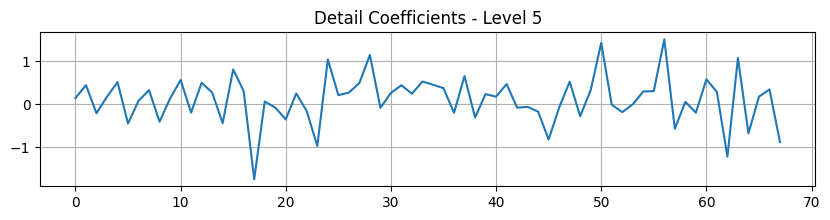

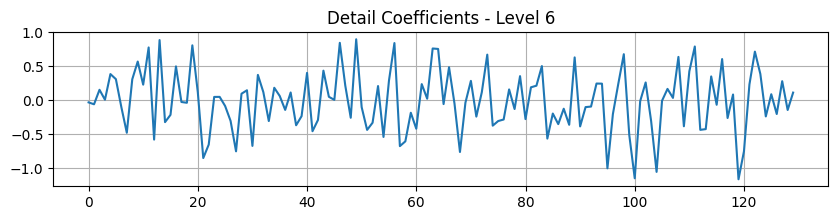

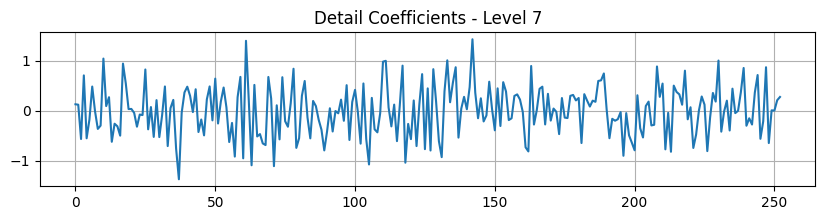

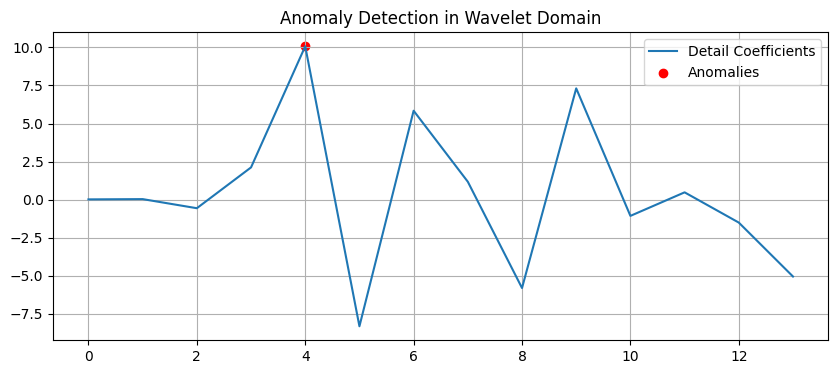

In [47]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1. 진동 데이터 생성 (노이즈 포함)
np.random.seed(42)
time = np.linspace(0, 1, num=500)
signal = np.sin(5 * 2 * np.pi * time)  # 기본 진동 신호
noise = np.random.normal(0, 0.5, size=time.shape)  # 노이즈
anomaly = np.zeros_like(time)
anomaly[100:120] = 2  # 특정 구간에 이상 신호 추가
vibration_data = signal + noise + anomaly

# 2. 진동 데이터와 노이즈 포함 데이터를 시각화
plt.figure(figsize=(12, 6))

# 기본 진동 신호 시각화
plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Pure Vibration Data', color='blue')
plt.title('Pure Vibration Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# 노이즈가 포함된 진동 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(time, vibration_data, label='Vibration Data with Noise & Anomaly', color='orange')
plt.title('Vibration Signal with Noise and Anomaly')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. 이산 웨이블릿 변환(DWT) 수행
wavelet = 'db4'  # Daubechies 웨이블릿 사용
coeffs = pywt.wavedec(vibration_data, wavelet)

# 4. 세부 계수 시각화
for i, coeff in enumerate(coeffs):
    plt.figure(figsize=(10, 2))
    plt.plot(coeff)
    plt.title(f'Detail Coefficients - Level {i+1}')
    plt.grid(True)
    plt.show()

# 5. Level 1 세부 계수 (고주파 성분)를 이용한 이상 탐지
detail_coeffs = coeffs[1]  # 가장 고주파 성분

# 6. Z-score로 이상치 탐지
z_scores = zscore(detail_coeffs)
threshold = 2  # 임계값 설정 (절대 값이 3 이상인 경우 이상치로 간주)
anomalies = np.where(np.abs(z_scores) > threshold)[0]

# 7. 이상치 시각화
plt.figure(figsize=(10, 4))
plt.plot(detail_coeffs, label='Detail Coefficients')
plt.scatter(anomalies, detail_coeffs[anomalies], color='r', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection in Wavelet Domain')
plt.grid(True)
plt.show()


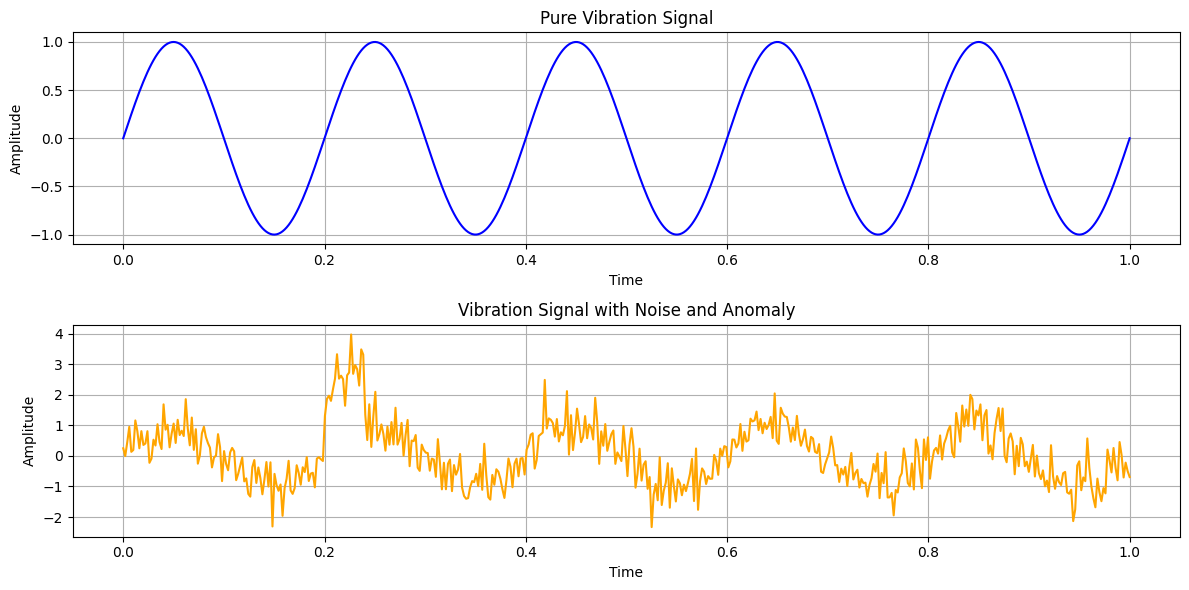

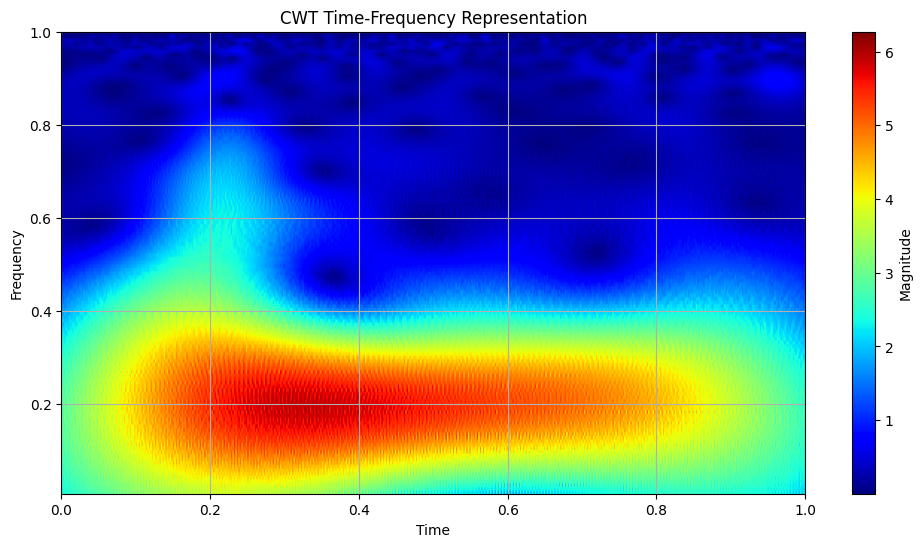

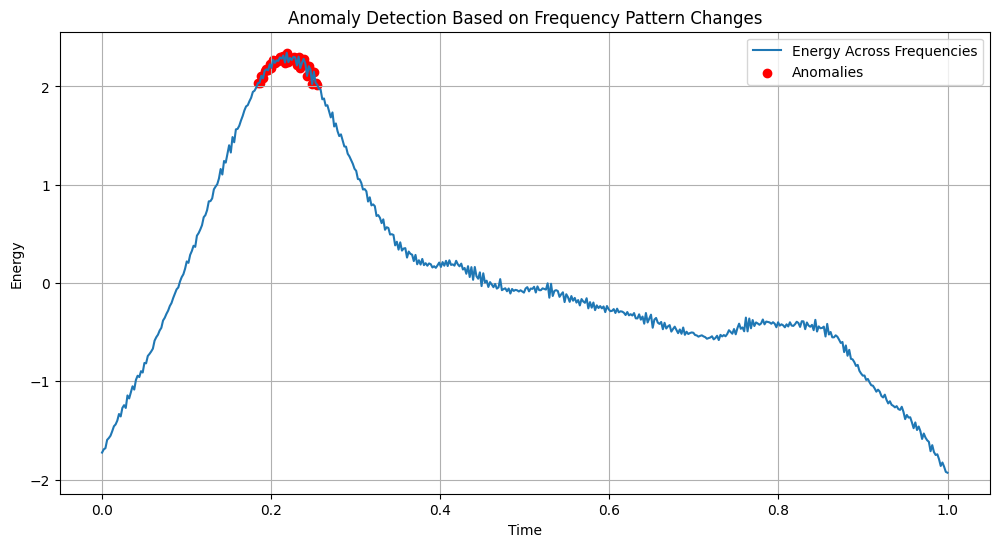

In [53]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1. 진동 데이터 생성 (노이즈 포함)
np.random.seed(42)
time = np.linspace(0, 1, num=500)
signal = np.sin(5 * 2 * np.pi * time)  # 기본 진동 신호
noise = np.random.normal(0, 0.5, size=time.shape)  # 노이즈
anomaly = np.zeros_like(time)
anomaly[100:120] = 2  # 특정 구간에 이상 신호 추가
vibration_data = signal + noise + anomaly

# 2. 진동 데이터와 노이즈 포함 데이터를 시각화
plt.figure(figsize=(12, 6))

# 기본 진동 신호 시각화
plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Pure Vibration Data', color='blue')
plt.title('Pure Vibration Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# 노이즈가 포함된 진동 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(time, vibration_data, label='Vibration Data with Noise & Anomaly', color='orange')
plt.title('Vibration Signal with Noise and Anomaly')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. 연속 웨이블릿 변환(CWT) 수행
scales = np.arange(1, 128)  # 스케일 범위 설정
wavelet = 'cmor1.5-1.0'  # Complex Morlet 웨이블릿 사용
coeffs, frequencies = pywt.cwt(vibration_data, scales, wavelet)

# 4. CWT 결과 시각화 (시간-주파수 스펙트로그램)
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coeffs), extent=[time.min(), time.max(), frequencies.min(), frequencies.max()], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('CWT Time-Frequency Representation')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5. 주파수 변화 패턴 기반 이상 탐지
# 주파수 도메인에서 높은 변화를 보이는 구간을 탐지하기 위해 각 시간대의 변화를 분석
energy = np.sum(np.abs(coeffs), axis=0)  # 주파수 범위에서의 에너지 합산

# Z-score로 이상치 탐지
z_scores = zscore(energy)
threshold = 2  # 임계값 설정 (절대 값이 3 이상인 경우 이상치로 간주)
anomalies = np.where(np.abs(z_scores) > threshold)[0]

# 6. 에너지와 이상치 시각화
plt.figure(figsize=(12, 6))
plt.plot(time, z_scores, label='Energy Across Frequencies')
plt.scatter(time[anomalies], z_scores[anomalies], color='r', label='Anomalies')
plt.title('Anomaly Detection Based on Frequency Pattern Changes')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
z_scores.max()

2.3432515641899903